# Model Comparison
## SMOTE 

### Logistic Regression - Original Dataset
### SMOTE - Logistic Regression, Random Forest, XGBoost
- Have tested for 80/20 and 70/30, but no significant difference. Therefore only considered 80/20 for the final comparison

In [6]:
#import libraries
import pandas as pd
import numpy as np


In [8]:
#loading data
df = pd.read_csv(r"C:\Users\Pulani\Desktop\NTUCLHUB\MYPROJECT_CAPSTONE\Project 1 - Finance - Predictive Analytics\Dataset\loan.csv")
print ("Data loaded successfully!")

# Display the first few rows of the dataset
df.head()

Data loaded successfully!


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [10]:
#Check data types
df.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [12]:
# Set the reference date to January 1, 1970 (Unix Epoch)
reference_date = pd.to_datetime('1970-01-01')

# Convert date columns to datetime format, with day first
df['application_date'] = pd.to_datetime(df['application_date'], dayfirst=True)
df['approval_date'] = pd.to_datetime(df['approval_date'], dayfirst=True)
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'], dayfirst=True)
df['due_date'] = pd.to_datetime(df['due_date'], dayfirst=True)

# Calculate the number of days since the reference date (Unix Epoch)
df['application_days'] = (df['application_date'] - reference_date).dt.days
df['approval_days'] = (df['approval_date'] - reference_date).dt.days
df['disbursement_days'] = (df['disbursement_date'] - reference_date).dt.days
df['due_days'] = (df['due_date'] - reference_date).dt.days

# Drop the original date columns
df = df.drop(['application_date', 'approval_date', 'disbursement_date', 'due_date'], axis=1)

# Check the updated DataFrame
print("Updated DataFrame after processing date columns:")
df.head()

Updated DataFrame after processing date columns:


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status,application_days,approval_days,disbursement_days,due_days
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False,17626,17644,17645,17757
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False,19356,19357,19369,19452
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False,18215,18218,18227,18316
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False,18864,18878,18881,19048
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False,18507,18512,18516,18625


In [14]:
# Drop the customer_id and loan_id columns
df = df.drop(['customer_id', 'loan_id'], axis=1)

# Check the updated DataFrame
print("Updated DataFrame after dropping customer_id and loan_id:")
df.head()

Updated DataFrame after dropping customer_id and loan_id:


,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status,application_days,approval_days,disbursement_days,due_days
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False,17626,17644,17645,17757
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False,19356,19357,19369,19452
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False,18215,18218,18227,18316
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False,18864,18878,18881,19048
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False,18507,18512,18516,18625


In [16]:
#Unique values in education_level
df["education_level"].unique()

array(['Master', 'Bachelor', 'High School', 'PhD'], dtype=object)

In [18]:
#Unique values in income_level
df["income_level"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize separate LabelEncoders for each column
income_encoder = LabelEncoder()
education_encoder = LabelEncoder()

# Apply LabelEncoder to income_level and education_level columns
df['income_level'] = income_encoder.fit_transform(df['income_level']) + 1
df['education_level'] = education_encoder.fit_transform(df['education_level']) + 1

# Optional: Print the mappings for verification
income_mapping = {label: num + 1 for num, label in enumerate(income_encoder.classes_)}
education_mapping = {label: num + 1 for num, label in enumerate(education_encoder.classes_)}

print("Income Level Mapping:")
print(income_mapping)

print("Education Level Mapping:")
print(education_mapping)

Income Level Mapping:
{'High': 1, 'Low': 2, 'Medium': 3}
Education Level Mapping:
{'Bachelor': 1, 'High School': 2, 'Master': 3, 'PhD': 4}


In [21]:
#Unique values in employment_type
df["employment_type"].unique()

array(['Self-employed', 'Full-time', 'Part-time'], dtype=object)

In [26]:
#Unique values in gender
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
#Unique values in marital_status
df["marital_status"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [30]:
#Unique values in loan_type 
df["loan_type"].unique()

array(['Car Loan', 'Personal Loan', 'Home Loan', 'Education Loan'],
      dtype=object)

In [32]:
# Convert default_status (boolean) to int
df['default_status'] = df['default_status'].astype(int)

# One-hot encode remaining categorical columns
# Assuming the other categorical columns are 'loan_type', 'employment_type', 'gender', 'marital_status'
df = pd.get_dummies(df, columns=['loan_type', 'employment_type', 'gender', 'marital_status'], drop_first=True, dtype=int)


In [37]:
# Check the updated DataFrame
print("Updated DataFrame after one-hot encoding:")
df.head()

Updated DataFrame after one-hot encoding:


,loan_amount,interest_rate,loan_term,income_level,credit_score,education_level,default_status,application_days,approval_days,disbursement_days,due_days,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,gender_Male,marital_status_Married,marital_status_Single
0,16795,0.051852,15,3,833,3,0,17626,17644,17645,17757,0,0,0,0,1,1,0,1
1,1860,0.089296,56,3,776,1,0,19356,19357,19369,19452,0,0,1,0,0,0,1,0
2,77820,0.070470,51,2,697,2,0,18215,18218,18227,18316,0,0,1,0,0,1,0,0
3,55886,0.062155,30,2,795,4,0,18864,18878,18881,19048,0,0,0,0,0,0,1,0
4,7265,0.070635,48,2,519,2,0,18507,18512,18516,18625,0,1,0,1,0,0,1,0


In [34]:
# Step 1: Summary statistics of numerical columns
print("Summary statistics of numerical columns:")
df.describe()

Summary statistics of numerical columns:


,loan_amount,interest_rate,loan_term,income_level,credit_score,education_level,default_status,application_days,approval_days,disbursement_days,due_days,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,gender_Male,marital_status_Married,marital_status_Single
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,2.011400,573.206000,2.512800,0.19980,18439.405800,18453.801800,18460.83720,18565.45140,0.236400,0.252800,0.256200,0.334400,0.333800,0.508400,0.336200,0.327400
std,28721.249529,0.015230,13.792501,0.810803,158.647522,1.124495,0.39989,524.469188,524.581588,524.59034,527.44749,0.424913,0.434661,0.436577,0.471827,0.471616,0.499979,0.472456,0.469312
min,1055.000000,0.031685,12.000000,1.000000,300.000000,1.000000,0.00000,17532.000000,17537.000000,17539.00000,17578.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24953.500000,0.069240,24.000000,1.000000,435.000000,1.000000,0.00000,17975.000000,17989.750000,18000.00000,18101.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49730.000000,0.079533,35.000000,2.000000,571.000000,3.000000,0.00000,18432.500000,18446.000000,18454.00000,18559.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,75083.500000,0.089984,47.000000,3.000000,712.000000,4.000000,0.00000,18894.000000,18908.000000,18915.00000,19023.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99989.000000,0.138894,59.000000,3.000000,849.000000,4.000000,1.00000,19358.000000,19384.000000,19392.00000,19542.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train- Test Split

In [36]:
# Import required libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('default_status', axis=1)  # Features (drop the target column)
y = df['default_status']  # Target (the column we want to predict)

# Perform the train-test split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (4000, 18) (4000,)
Testing set shape (X_test, y_test): (1000, 18) (1000,)


In [40]:
#Check data types
df.dtypes

loan_amount                        int64
interest_rate                    float64
loan_term                          int64
income_level                       int32
credit_score                       int64
education_level                    int32
default_status                     int32
application_days                   int64
approval_days                      int64
disbursement_days                  int64
due_days                           int64
loan_type_Education Loan           int32
loan_type_Home Loan                int32
loan_type_Personal Loan            int32
employment_type_Part-time          int32
employment_type_Self-employed      int32
gender_Male                        int32
marital_status_Married             int32
marital_status_Single              int32
dtype: object

Confusion Matrix:
[[405 391]
 [103 101]]


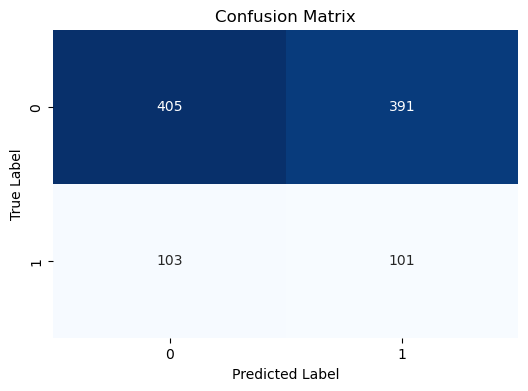


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.51      0.62       796
           1       0.21      0.50      0.29       204

    accuracy                           0.51      1000
   macro avg       0.50      0.50      0.46      1000
weighted avg       0.68      0.51      0.55      1000



In [44]:
#Logistic Regression

# Standardize the feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [55]:
# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

Class distribution before SMOTE:
default_status
0    4001
1     999
Name: count, dtype: int64


**Class distribution is not balanced**
- but resuts has been improved
- will apply SMOTE


Confusion Matrix:
[[607 193]
 [155  45]]


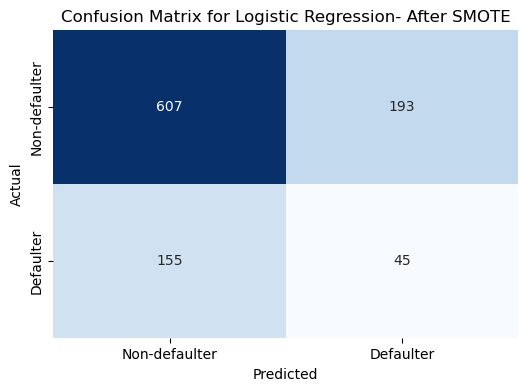


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       800
           1       0.19      0.23      0.21       200

    accuracy                           0.65      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.68      0.65      0.66      1000



In [59]:
#After SMOTE Logistic Regression,80/20:

# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define the features (X) and target (y)
X = df.drop('default_status', axis=1)
y = df['default_status']

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training set to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-defaulter', 'Defaulter'], yticklabels=['Non-defaulter', 'Defaulter'])
plt.title('Confusion Matrix for Logistic Regression- After SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [59]:
# Check class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
default_status
0    3201
1    3201
Name: count, dtype: int64


**Class distribution is balanced after SMOTE**
- but resuts not good
- will apply random forest with SMOTE


In [61]:
#After SMOTE Logistic Regression, 70/30:

# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming your data is already loaded into a DataFrame called df
# df = pd.read_csv('your_dataset.csv')

# Define the features (X) and target (y)
X = df.drop('default_status', axis=1)
y = df['default_status']

# Split the dataset into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to the training set to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[912 288]
 [229  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1200
           1       0.20      0.24      0.22       300

    accuracy                           0.66      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.68      0.66      0.67      1500



In [67]:
#RANDOM FOREST AFTER SMOTE, 70/30


# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame
# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Creating the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fitting the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1199    1]
 [ 300    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1200
           1       0.00      0.00      0.00       300

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



Confusion Matrix:
[[800   0]
 [200   0]]


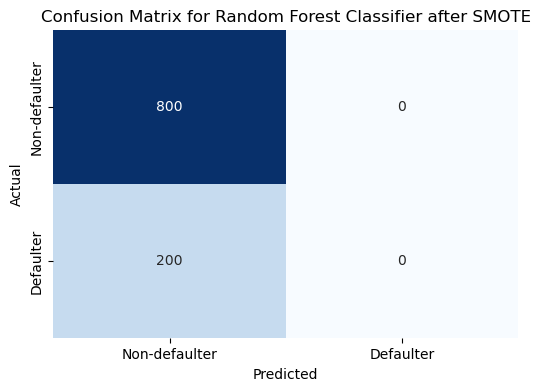


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       800
           1       0.00      0.00      0.00       200

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000



C:\Users\Pulani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pulani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pulani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
#RANDOM FOREST AFTER SMOTE, 80/20 
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame
# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creating the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fitting the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-defaulter', 'Defaulter'], yticklabels=['Non-defaulter', 'Defaulter'])
plt.title('Confusion Matrix for Random Forest Classifier after SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


**Class distribution is balanced after SMOTE**
**but resuts not good for XGBoost (70/30 or 80/20)**

**Suggestions:**
- **Balance the dataset**: If you haven’t already, apply techniques such as SMOTE or undersampling to address the class imbalance.
- **Adjust class weights**: In logistic regression, you can use the class_weight='balanced' parameter to penalize misclassifications of the minority class.
- **Tune the decision threshold**: Adjust the decision threshold for classifying an instance as positive (defaulter). By default, this is 0.5, but lowering it might help capture more defaulters.
- **Try other models**: Models like Random Forest or XGBoost might perform better on imbalanced data when combined with class weighting or balancing techniques.

Confusion Matrix:
[[682 118]
 [169  31]]


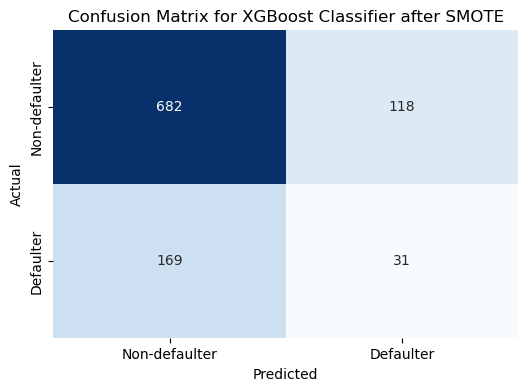


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       800
           1       0.21      0.15      0.18       200

    accuracy                           0.71      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.68      0.71      0.70      1000



In [54]:
#XGBoost AFTER SMOTE, 80/20 
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame
# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Splitting the dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creating the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Fitting the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-defaulter', 'Defaulter'], yticklabels=['Non-defaulter', 'Defaulter'])
plt.title('Confusion Matrix for XGBoost Classifier after SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [77]:
#XGBoost AFTER SMOTE, 70/30 
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame
# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Splitting the dataset into train and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Creating the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Fitting the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1017  183]
 [ 257   43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1200
           1       0.19      0.14      0.16       300

    accuracy                           0.71      1500
   macro avg       0.49      0.50      0.49      1500
weighted avg       0.68      0.71      0.69      1500



In [ ]:
# Class distribution is balanced after SMOTE
# but resuts not good for XGBoost (70/30 or 80/20)
# will apply random forest without smote in jp10


## Model Comparison Original Data Set

In [86]:
# Import necessary libraries
import pandas as pd

# Create the table for model comparison based on the provided results for the original dataset
data_original_dataset = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.53, 0.80, 0.71],
    'Precision (Class 0)': [0.81, 0.80, 0.80],
    'Recall (Class 0)': [0.55, 1.00, 0.85],
    'F1-Score (Class 0)': [0.65, 0.89, 0.82],
    'Precision (Class 1)': [0.21, 0.00, 0.19],
    'Recall (Class 1)': [0.49, 0.00, 0.14],
    'F1-Score (Class 1)': [0.30, 0.00, 0.16]
}

# Create DataFrame
df_original_dataset_results = pd.DataFrame(data_original_dataset)

# Display the DataFrame
df_original_dataset_results


,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,0.53,0.81,0.55,0.65,0.21,0.49,0.30
1,Random Forest,0.80,0.80,1.00,0.89,0.00,0.00,0.00
2,XGBoost,0.71,0.80,0.85,0.82,0.19,0.14,0.16


**Conclusion:** 
- **Logistic Regression is the most balanced** model but still struggles to accurately predict defaulters, with an overall low performance for Class 1.
- **Random Forest** performs very well for non-defaulters (Class 0) but **completely fails to identify defaulters (Class 1)**. This is a significant problem, as identifying defaulters is critical.
- **XGBoost** Offers a better balance than Random Forest, though its performance on defaulters is still weak.

## Model Comparison After Aplying SMOTE


In [91]:
# Import necessary libraries
import pandas as pd

# Create the table for model comparison based on the provided results after applying SMOTE
data_smote = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.65, 0.80, 0.71],
    'Precision (Class 0)': [0.80, 0.80, 0.80],
    'Recall (Class 0)': [0.76, 1.00, 0.85],
    'F1-Score (Class 0)': [0.78, 0.89, 0.83],
    'Precision (Class 1)': [0.19, 0.00, 0.21],
    'Recall (Class 1)': [0.23, 0.00, 0.15],
    'F1-Score (Class 1)': [0.21, 0.00, 0.18]
}

# Create a DataFrame
df_smote_results = pd.DataFrame(data_smote)

# Display the DataFrame
df_smote_results

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,0.65,0.8,0.76,0.78,0.19,0.23,0.21
1,Random Forest,0.80,0.8,1.00,0.89,0.00,0.00,0.00
2,XGBoost,0.71,0.8,0.85,0.83,0.21,0.15,0.18


**Conclusion**

- **Random Forest** has the highest accuracy but fails to identify defaulters, making it unsuitable when Class 1 (defaulters) is important.

- **Logistic Regression** is more balanced, providing slightly better recall and F1-score for defaulters than the other models, but still needs improvement.

- **XGBoost** offers better results than Random Forest for defaulters, but overall performance remains weak.